In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
# Load data
OTU = pd.read_csv('data_normalized.csv',sep=',',index_col=0)
GRP = pd.read_csv('group_mpd.csv',sep=',',index_col=0)
OTU.head(10)

,S33,S29,S30,S31,S32,S34,S35,S36,S37,S38,...,S19,S28,S20,S21,S22,S23,S24,S25,S26,S27
Clostridium_sensu_stricto_1,0.000000e+00,0.000000e+00,0.000000e+00,5.076142e+04,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000000e+00
Proteus,5.076142e+04,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,5.076142e+04,0.000000e+00,1.015228e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000000e+00
Romboutsia,2.538071e+05,1.522843e+05,4.568528e+05,1.015228e+05,1.015228e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.167513e+06,0.000000e+00,2.538071e+05,5.076142e+04,2.538071e+05,5.076142e+04,0.000000e+00,0.000000e+00,0.000,1.015228e+05
Pseudomonas,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000000e+00
Enterococcus,2.538071e+05,2.538071e+05,5.076142e+04,0.000000e+00,2.538071e+05,3.045685e+05,1.522843e+05,5.583756e+05,2.538071e+05,2.030457e+05,...,0.000000e+00,5.076142e+04,0.000000e+00,5.076142e+04,0.000000e+00,5.076142e+04,1.522843e+05,5.076142e+04,0.000,0.000000e+00
Lactobacillus,5.380711e+06,5.634518e+06,6.598985e+06,5.634518e+06,3.604061e+06,5.837563e+06,5.685279e+06,5.786802e+06,4.060914e+06,3.857868e+06,...,3.147208e+06,2.893401e+06,2.436548e+06,3.401015e+06,3.959391e+06,2.335025e+06,3.705584e+06,1.928934e+06,3197969.543,3.096447e+06
Staphylococcus,1.522843e+05,5.076142e+04,5.076142e+04,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.060914e+05,1.522843e+05,2.030457e+05,2.538071e+05,4.060914e+05,5.076142e+04,5.076142e+04,5.076142e+04,0.000,2.538071e+05
Haemophilus,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.015228e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000000e+00
Escherichia_Shigella,3.197970e+06,3.248731e+06,1.827411e+06,3.248731e+06,5.076142e+06,2.182741e+06,3.045685e+06,1.472081e+06,5.177665e+06,5.126904e+06,...,5.177665e+06,6.751269e+06,7.005076e+06,5.888325e+06,5.228426e+06,7.309645e+06,5.888325e+06,7.664975e+06,6802030.457,6.294416e+06
Rothia,5.076142e+04,2.538071e+05,4.568528e+05,3.553299e+05,3.045685e+05,4.060914e+05,3.553299e+05,6.598985e+05,1.015228e+05,3.045685e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000000e+00


In [4]:
GRP.head(5)

,ID,Response
S19,RS7-A1,A
S20,RS7-A2,A
S21,RS7-A3,A
S22,RS7-A4,A
S23,RS7-A5,A


In [5]:
def create_heatmap(otus_data,metadata,condition ="Response" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    # print(otus_data)
    # Extracting the numeric part using regular expressions and creating a new column
    # otus_data[condition] = otus_data[condition].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sorting the DataFrame based on the numeric part
    otus_data = otus_data.sort_values(by=condition)
    # otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(OTU,GRP)
heatmap.head(10)

,S23,S22,S21,S20,S19,S27,S25,S24,S28,S26,...,S32,S31,S30,S29,S37,S36,S35,S34,S38,S39
Clostridium_sensu_stricto_1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,...,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00
Proteus,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,...,0.000000e+00,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,1.015228e+05,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00
Romboutsia,5.076142e+04,2.538071e+05,5.076142e+04,2.538071e+05,1.167513e+06,1.015228e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000,...,1.015228e+05,1.015228e+05,4.568528e+05,1.522843e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.076142e+04
Pseudomonas,0.000000e+00,0.000000e+00,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Enterococcus,5.076142e+04,0.000000e+00,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.076142e+04,1.522843e+05,5.076142e+04,0.000,...,2.538071e+05,0.000000e+00,5.076142e+04,2.538071e+05,2.538071e+05,5.583756e+05,1.522843e+05,3.045685e+05,2.030457e+05,3.045685e+05
Lactobacillus,2.335025e+06,3.959391e+06,3.401015e+06,2.436548e+06,3.147208e+06,3.096447e+06,1.928934e+06,3.705584e+06,2.893401e+06,3197969.543,...,3.604061e+06,5.634518e+06,6.598985e+06,5.634518e+06,4.060914e+06,5.786802e+06,5.685279e+06,5.837563e+06,3.857868e+06,5.126904e+06
Staphylococcus,5.076142e+04,4.060914e+05,2.538071e+05,2.030457e+05,4.060914e+05,2.538071e+05,5.076142e+04,5.076142e+04,1.522843e+05,0.000,...,0.000000e+00,5.076142e+04,5.076142e+04,5.076142e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Haemophilus,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.015228e+05,5.076142e+04
Escherichia_Shigella,7.309645e+06,5.228426e+06,5.888325e+06,7.005076e+06,5.177665e+06,6.294416e+06,7.664975e+06,5.888325e+06,6.751269e+06,6802030.457,...,5.076142e+06,3.248731e+06,1.827411e+06,3.248731e+06,5.177665e+06,1.472081e+06,3.045685e+06,2.182741e+06,5.126904e+06,3.756345e+06
Rothia,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,...,3.045685e+05,3.553299e+05,4.568528e+05,2.538071e+05,1.015228e+05,6.598985e+05,3.553299e+05,4.060914e+05,3.045685e+05,3.553299e+05


In [6]:
def colordict(metadata,condition ='Response' ):
    # color_dict=dict(zip(np.unique(metadata[condition]),np.array(['red','yellow','blue','g'])))
    color_dict = {'A': 'red', 'C': '#01BEC2','B': 'green','D': 'purple'}
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(GRP)
color_dict
# color_dict = {'PBS-PBS': 'red', 'PBS-SCB34': '#01BEC2','Lac-PBS': 'green','Lac-SCB34': 'purple'}

{'A': 'red', 'C': '#01BEC2', 'B': 'green', 'D': 'purple'}

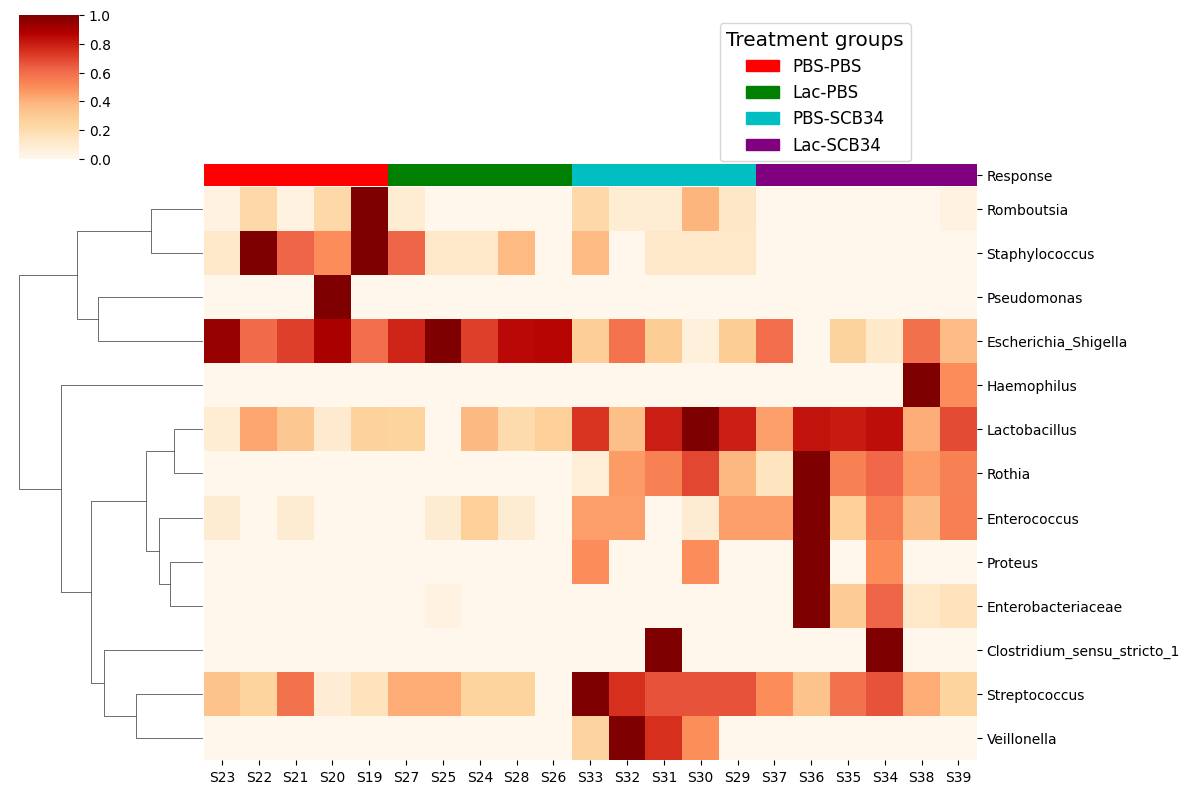

In [7]:
import matplotlib.patches as mpatches
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(12, 8))
    # Create a color legend using the color_dict
    # legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    # legend_colors = [color for _, color in color_dict.items()]
    # legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    # plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    # ax_row_labels = hm.ax_row_dendrogram
    # ax_col_labels = hm.ax_col_dendrogram
    # Create a legend for 'Category' colors
    red_patch = mpatches.Patch(color='red', label='PBS-PBS')
    blue_patch = mpatches.Patch(color='#01BEC2', label='PBS-SCB34')
    green_patch = mpatches.Patch(color='green', label='Lac-PBS')
    orange_patch = mpatches.Patch(color='purple', label='Lac-SCB34')
    legend = plt.legend(handles=[red_patch, green_patch, blue_patch ,orange_patch ], title='Treatment groups',bbox_to_anchor=(15, 1), loc='upper right',fontsize='large')
    # Increase the font size of the legend
    plt.setp(legend.get_title(), fontsize='x-large')
    # # Set row and column labels font size
    # row_font_size = 4
    # col_font_size = 4

    # for label in ax_row_labels.get_yticklabels():
    #     label.set_fontsize(row_font_size)

    # for label in ax_col_labels.get_xticklabels():
    #     label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = ""
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)